# <span style="color:blue"> SLACK - BOT</span>

In [1]:
# Importamos librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
df = pd.read_csv('files/slack_historial_de_mensajes_filtrados.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'index', 'Unnamed: 0.1', 'client_msg_id', 'type', 'text',
       'ts', 'team', 'blocks', 'bot_id', 'bot_profile', 'files', 'upload',
       'display_as_bot', 'thread_ts', 'reply_count', 'reply_users_count',
       'latest_reply', 'reply_users', 'subscribed', 'reactions', 'subtype',
       'inviter', 'edited', 'attachments', 'Channel_id', 'Channel_name',
       'bot_link', 'purpose', 'user_hash', 'datetime', 'date', 'time', 'h',
       'm', 's', 'translations'],
      dtype='object')

In [4]:
df.shape

(378, 37)

In [5]:
df.reset_index(inplace=True)

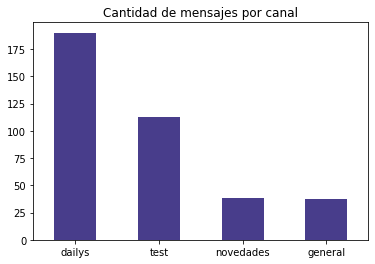

In [26]:
plot1 = df['Channel_name'].value_counts().plot(kind='bar',
                                               color='darkslateblue',
                                               title='Cantidad de mensajes por canal')
plt.xticks(rotation=0)
plt.savefig('figures/cantidad_mensajes_por_canal.jpg')

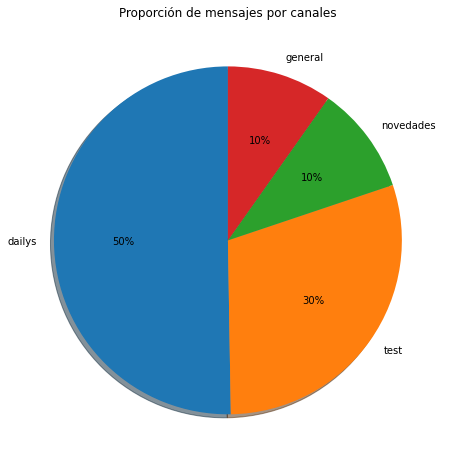

In [31]:
plt.figure (figsize=(10,8))
plot2 = df['Channel_name'].value_counts().plot(kind='pie',
                                               autopct='%1.0f%%',
                                               shadow=True,
                                               startangle=90,
                                               title='Proporción de mensajes por canales')
plt.xlabel('')
plt.ylabel('')
plt.savefig('figures/cantidad_mensajes_por_canal_circular.jpg')

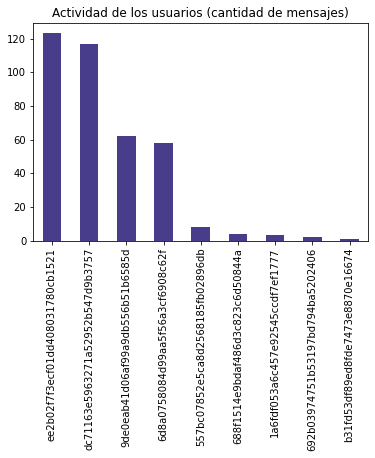

In [36]:
plot3 = df['user_hash'].value_counts().plot(kind='bar',
                                       color='darkslateblue',
                                       title='Actividad de los usuarios (cantidad de mensajes)')
plt.savefig('figures/actividad_de_los_usuarios.jpg')

### 1) Análisis de polaridad y subjetividad

In [7]:
# Creo dos nuevas variables en el dataset para almacenar la información de los índices de polaridad y subjetividad
df['polarity'] = df['translations'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['translations'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [8]:
important_cols = ['Channel_id', 'text', 'translations', 'polarity', 'subjectivity']
df[important_cols]

,Channel_id,text,translations,polarity,subjectivity
0,C01C9U9CJ3S,"Gracias. Ya les escribí, espero se una alguien.","Thank you. I already wrote, I hope someone wil...",0.0000,0.00
1,C01C9U9CJ3S,Cuidese no mas,Take care no more,-0.2500,0.50
2,C01C9U9CJ3S,hola buenos días ! ok :wink:,Hello good day ! ok: wink:,0.6875,0.55
3,C01C9U9CJ3S,No pasa nada!,Nothing happens!,0.0000,0.00
4,C01C9U9CJ3S,Dale Ivan! Buen día!,Go Ivan! Good day!,0.8750,0.60
...,...,...,...,...,...
373,C01BDAZ7YVC,:wave: Hello!,: wave: Hello!,0.0000,0.00
374,C01BDAZ7YVC,Jeñou,Jeñou,0.0000,0.00
375,C01BDAZ7YVC,:wave: ¡Hola a todo el mundo!,: wave: Hello everyone!,0.0000,0.00
376,C01BDAZ7YVC,:wave: Hi everyone!,: wave: Hi everyone!,0.0000,0.00


In [9]:
# Lo guardamos como un archivo .csv
df.to_csv('files/slack_historial_de_mensajes_polarizados.csv', sep=',')

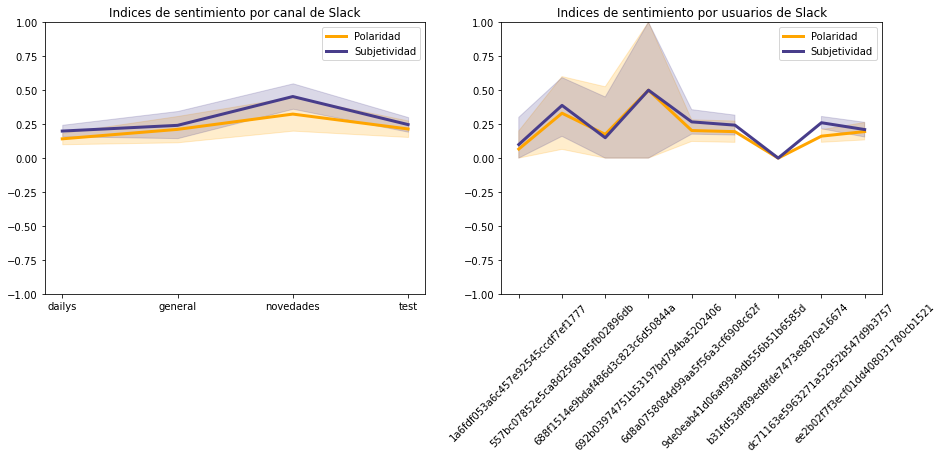

In [10]:
plt.figure (figsize=(15,5))

plt.subplot(121)
p1= sns.lineplot(data=df, x='Channel_name', y='polarity', estimator=np.mean, color='orange', label='Polaridad',linewidth=3)
sns.lineplot(data=df, x='Channel_name', y='subjectivity', estimator=np.mean, color='darkslateblue', label='Subjetividad',linewidth=3)
plt.xticks(rotation=90);
plt.xlabel('')
plt.ylabel('')
plt.ylim(-1,1)
plt.xticks(rotation=0)
plt.title('Indices de sentimiento por canal de Slack')

plt.subplot(122)
p1= sns.lineplot(data=df, x='user_hash', y='polarity', estimator=np.mean, color='orange', label='Polaridad',linewidth=3)
sns.lineplot(data=df, x='user_hash', y='subjectivity', estimator=np.mean, color='darkslateblue', label='Subjetividad',linewidth=3)
plt.xticks(rotation=90);
plt.xlabel('')
plt.ylabel('')
plt.ylim(-1,1)
plt.xticks(rotation=45)
plt.title('Indices de sentimiento por usuarios de Slack')

plt.savefig('figures/01_indices_de_sentimiento.jpg')

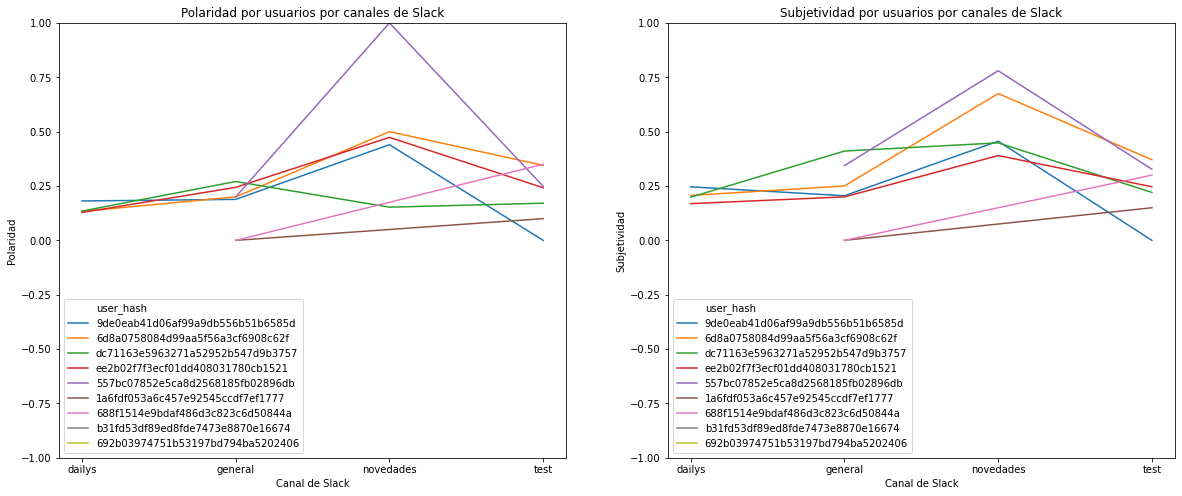

In [11]:
plt.figure (figsize=(20,8))

plt.subplot(121)
plt1= sns.lineplot(data=df, x='Channel_name', y='polarity', hue='user_hash',ci=None)
plt.xticks(rotation=0);
plt.xlabel('Canal de Slack')
plt.ylabel('Polaridad')
plt.ylim(-1,1)
plt.title('Polaridad por usuarios por canales de Slack')

plt.subplot(122)
plt1= sns.lineplot(data=df, x='Channel_name', y='subjectivity', hue='user_hash',ci=None)
plt.xticks(rotation=0);
plt.xlabel('Canal de Slack')
plt.ylabel('Subjetividad')
plt.ylim(-1,1)
plt.title('Subjetividad por usuarios por canales de Slack')

plt.savefig('figures/02_indices_de_sentimiento_por_usuarios.jpg')

### 4.2) Análisis de polaridad en español

In [12]:
from pysentimiento import SentimentAnalyzer
analyzer = SentimentAnalyzer()

C:\Users\verob\miniconda3\envs\meraki2\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [13]:
for i, row in df.iterrows():
    message = row['text']
    result=analyzer.predict_probas(message)
    df.loc[i,'negativity']=result['NEG']
    df.loc[i,'neutrality']=result['NEU']
    df.loc[i,'positivity']=result['POS']
    result_2=analyzer.predict(message)
    df.loc[i,'class']=str(result_2)

In [14]:
important_cols = ['Channel_id', 'text', 'translations', 'polarity', 'subjectivity', 'negativity','neutrality','positivity', 'class']
df[important_cols][:30]

,Channel_id,text,translations,polarity,subjectivity,negativity,neutrality,positivity,class
0,C01C9U9CJ3S,"Gracias. Ya les escribí, espero se una alguien.","Thank you. I already wrote, I hope someone wil...",0.0000,0.000000,0.010681,0.610909,0.378410,NEU
1,C01C9U9CJ3S,Cuidese no mas,Take care no more,-0.2500,0.500000,0.060622,0.838654,0.100725,NEU
2,C01C9U9CJ3S,hola buenos días ! ok :wink:,Hello good day ! ok: wink:,0.6875,0.550000,0.011608,0.271744,0.716648,POS
3,C01C9U9CJ3S,No pasa nada!,Nothing happens!,0.0000,0.000000,0.020419,0.794842,0.184739,NEU
4,C01C9U9CJ3S,Dale Ivan! Buen día!,Go Ivan! Good day!,0.8750,0.600000,0.006592,0.059489,0.933919,POS
5,C01C9U9CJ3S,Hola. Muy buenos días.\nNo podré estar hoy en ...,Hi. Very good days.\nI won't be able to be in ...,0.4700,0.468333,0.552896,0.428400,0.018704,NEG
6,C01C9U9CJ3S,Jajajajaja,Hahaha,0.2000,0.400000,0.044018,0.645802,0.310181,NEU
7,C01C9U9CJ3S,Si pueden por hoy cerrar este slack asi no les...,If you can close this slack for today so I don...,0.3250,0.325000,0.301947,0.679148,0.018904,NEU
8,C01C9U9CJ3S,jaja puede ser... les prometo que no me queda ...,haha it could be ... I promise you I don't hav...,0.1000,0.150000,0.486251,0.501620,0.012129,NEU
9,C01C9U9CJ3S,"Vero, te vas a tener que plantear otro modo de...","Vero, you are going to have to consider anothe...",0.5000,1.000000,0.888272,0.104631,0.007097,NEG


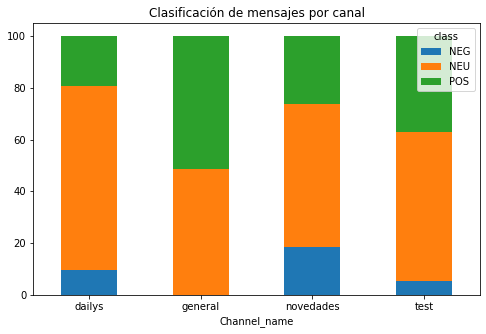

In [15]:
pd.crosstab(index=df['Channel_name'],columns=df['class']).apply(lambda r: r/r.sum()*100,axis=1).plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Clasificación de mensajes por canal')
plt.xticks(rotation=0)

plt.savefig('figures/Semaforo_clasificación_mensajes_Slack.jpg')

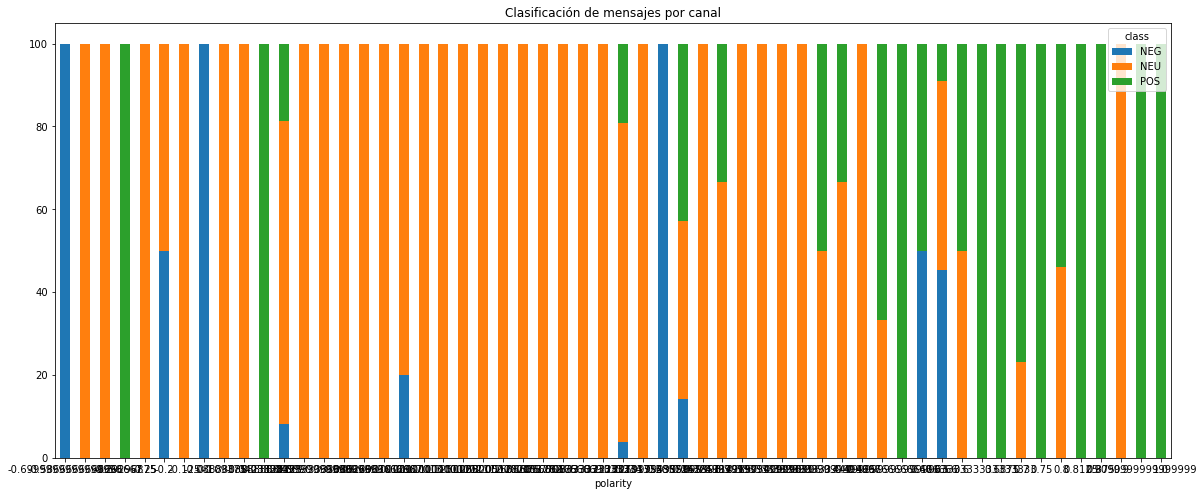

In [16]:
pd.crosstab(index=df['polarity'],columns=df['class']).apply(lambda r: r/r.sum()*100,axis=1).plot(kind='bar', stacked=True, figsize=(20,8))
plt.title('Clasificación de mensajes por canal')
plt.xticks(rotation=0)

plt.savefig('figures/Semaforo_clasificación_mensajes_Slack.jpg')

### 4.3) Análisis de series de tiempo

In [17]:
df.set_index('date', inplace=True)

In [18]:
df_sub= df['subjectivity']

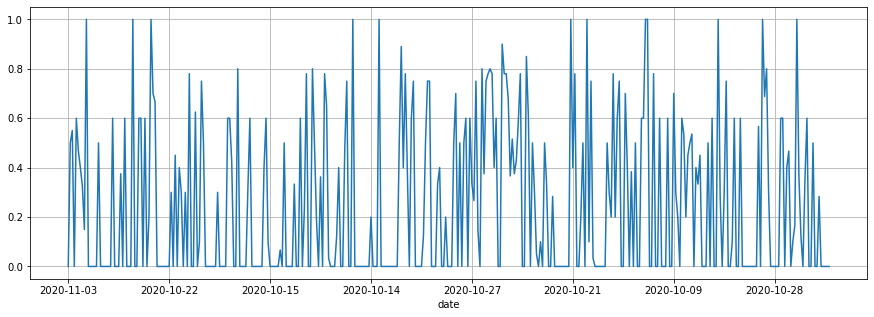

In [19]:
# Ahora que la variable 'datetime' se reconoce como una serie de tiempo, es momento de visualizar nuestros datos
df_sub.plot(grid=True, figsize=(15,5))

plt.savefig('figures/03_subjetividad_global.jpg')

In [20]:
df_pol= df['polarity']

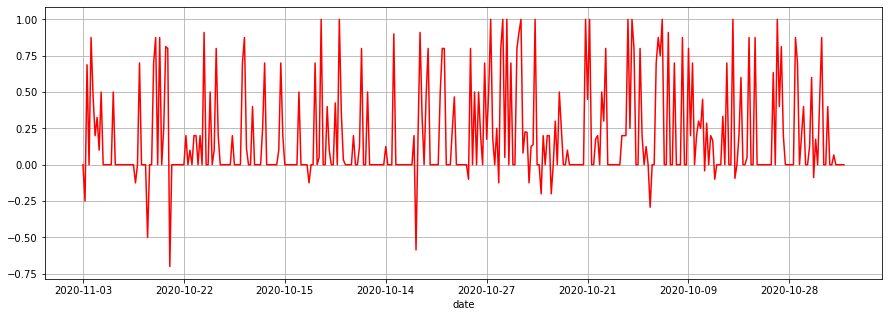

In [21]:
df_pol.plot(grid=True, figsize=(15,5), color='red')

plt.savefig('figures/04_polaridad_global.jpg')